# INFO 98: Data Science Skills, Spring 2019
## Lecture 06: Hypothesis Testing 

---

**Null Hypothesis**

## Table of Contents
* [Setup](#setup)
* [Demo](#demo)
    * Histogram
    * Bar Plot
    * Box Plot
    * Line Graph
    * Scatter Plot
    * Contout Plot
    * Heat Map
* [Customization](#customization)

<a id='setup'></a>
# Setup
____

In [1]:
# Comment out !pip install statements if you have those packages installed.

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets



<a id='Demo'></a>
# Demo
___

## **Simulating the flip of a coin**


**NOTE**: We are now going to simulate 20 flips of a fair coin 10,000 times

Our null hypothesis is that the coin is fair- we are hence gonna simulate under this assumption(Equal chance of getting a heads or a tails)

A simple but effective measure of this fairness is the absolute value of the difference between the numbers of heads and tails. High values indicate a biased coin and low values indicate a fair coin. This will be our test statistic.

We are gonna be using the sample _proportions function to simulate our coin tosses. The details of the function are given on the next slide.

The following demonstrates one simulation of 20 flips of a coin

In [3]:
model_proportions = make_array(.5,.5) #Fairness of our coin
repetitions=20

One_simulation = sample_proportions(repetitions, model_proportions)#vOne simulation of 20 flips of a coin


#We mutiply by repetitions because sample_proportions returns a proportions and not an integer
num_heads= One_simulation.item(0)*repetitions #the first item represents the number of heads
                                            
num_tails= One_simulation.item(1)*repetitions #the second item represents the number of heads

print(num_heads)
print(num_tails)




10.0
10.0


We then define a function that gives us our test statistic given a certain number of heads and tails.

In [4]:
def statistic(heads,tails):

    return abs(heads - tails)

statistic(num_heads,num_tails)

0.0

We now put both these elements together with a loop to simulate 20 flips of a coin 10,000 times. We then calculate the test statistic for each of these 10,000 times we flipped 20 coins and store this in an array.

This function below simulates **ONCE** coin_flips number of flips for a coin defined with the fairness of fairness_of_coin. The first element represents heads and the second tails. 

An example of coin biased towards heads would have fairness_of_coin be an array with (0.7,0.3) - similarly a coin biased towards tails would have an exampe fairness_of_coin defined as (0.3,0.7)

In [5]:


def simulation_and_statistic(coin_flips, fairness_of_coin):# Don't Worry if you don't understand why the code is doing what it is doing



    One_simulation = sample_proportions(coin_flips, fairness_of_coin)
    num_heads= One_simulation.item(0)*coin_flips
                                            
    num_tails= One_simulation.item(1)*coin_flips
    simulated_statistic = statistic(num_heads,num_tails)
    return simulated_statistic



We want to repeat this simulation 10000 times. We use a for loop to do this as shown below. We then store our test statistic for every simulation i.e The absolute difference between the number of heads and tails in an array. We do this for a fair coin first - hence our 2 element array is (0.5,0.5). 

In [6]:
repetitions = 20
num_simulations = 10000
fair_coin = make_array(.5,.5)


fair_coin_simulated_statistics = make_array() # Don't Worry if you don't understand why the code is doing what it is doing

for i in np.arange(num_simulations):
    fair_coin_simulated_statistics = np.append(fair_coin_simulated_statistics, simulation_and_statistic(repetitions, fair_coin))

We now have an array of 10000 values with each value representing the test statistic(Absolute difference of number of heads and number of tails) for one repetition of us flipping a coin 20 times

In [7]:
fair_coin_simulated_statistics 

array([12.,  4.,  4., ...,  2.,  8.,  2.])

We now create a histogram of all the values in fair_coin_simulated_statistics 

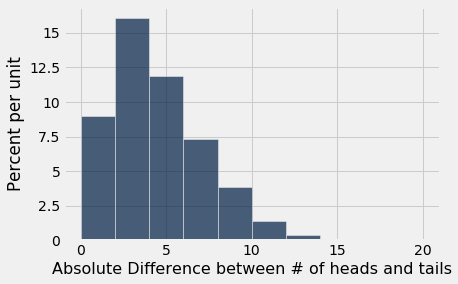

In [8]:
fair = Table().with_column('Absolute Difference between # of heads and tails', fair_coin_simulated_statistics )

fair.hist(bins=make_array(0,2,4,6,8,10,12,14,16,18,20))

Just to see if our simulation works like we think it should we repeat the same process but with a different coin - a coin biased towards heads

In [9]:
repetitions = 20
num_simulations = 10000
unfair_coin = make_array(0.8,0.2)


unfair_coin_simulated_statistics = make_array() # Don't Worry if you don't understand why the code is doing what it is doing

for i in np.arange(num_simulations):
    unfair_coin_simulated_statistics = np.append(unfair_coin_simulated_statistics, simulation_and_statistic(repetitions, unfair_coin))

Make a histogram again! What do you notice?

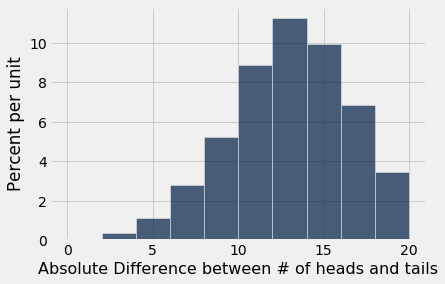

In [10]:
unfair = Table().with_column('Absolute Difference between # of heads and tails', unfair_coin_simulated_statistics )

unfair.hist(bins=make_array(0,2,4,6,8,10,12,14,16,18,20))

### Calculating our P Value

We now want to see how unlikely our observed event of getting 15 heads and 5 tails(or an event that is even more unfair) was assuming our coin was fair. Our observed test statistic is hence 10 since the absolute difference between 15 and 5 is 10.

In [11]:
observed_test_statistic = statistic(15,5)
observed_test_statistic

10

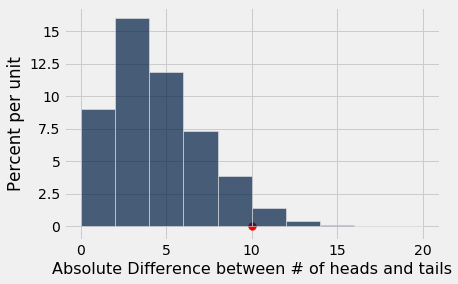

In [13]:
fair = Table().with_column('Absolute Difference between # of heads and tails', fair_coin_simulated_statistics )

fair.hist(bins=make_array(0,2,4,6,8,10,12,14,16,18,20))
plt.scatter(observed_test_statistic, 0, color='red', s=60);

To see how likely it is for us to get a test statistic of at least 10 we essentialy need to calculate the area to the right of 10 in the first histogram. Why do we choose the first histogram and not the second one? We want to work with the assumption that the coin was fair in the first place. We hence compare our observed test statistic to the distribution we get when we flip a fair coin. **(Always simulate under the null remember!)**

In [17]:
proportion_greater_or_equal = sum(fair_coin_simulated_statistics >=observed_test_statistic)/len(fair_coin_simulated_statistics) # SOLUTION
proportion_greater_or_equal 

0.0389

**Converting this to a percentage**

In [19]:
proportion_greater_or_equal_percentage = proportion_greater_or_equal*100
proportion_greater_or_equal_percentage


3.8899999999999997

**This is hence our P-Value. It gives us the probability  assuming that we have a fair coin that we get an absolute difference of 10 or greater purely by chance. Intuitively speaking this is very low but whether we choose to reject or not our null hypothesis depends on our significance level. We assumed our significance level to be 5% and we hence reject our null hypothesis. Our conclusion is that based on our observations, the coin is not fair - there is something other than chance causing the results we have seen.**


Let us now do the exact same calculation but with the second histogram that has results of the coin that was biased towards heads

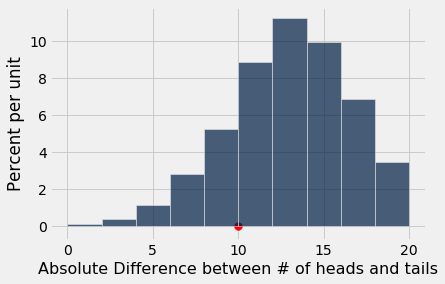

In [20]:
unfair.hist(bins=make_array(0,2,4,6,8,10,12,14,16,18,20))
plt.scatter(observed_test_statistic, 0, color='red', s=60);

proportion_greater_or_equal_unfair = sum(unfair_coin_simulated_statistics >=observed_test_statistic)/len(unfair_coin_simulated_statistics)

proportion_greater_or_equal_unfair
proportion_greater_or_equal_unfair_percentage = proportion_greater_or_equal_unfair*100 #To percentage
proportion_greater_or_equal_unfair_percentage


This as is evident is a very high p-value. We clearly fail to reject our null hypothesis here as this is much higher than our 5% significance level. This makes intuitive sense though. For a coin that turns to heads 70% of the times- getting 15 heads and 5 tails doesn't seem that out of the ordinary. This is reflected in the P-value

**Congratulations!! You just finished your first two hypothesis tests** We can do a very similar hypothesis test with die as well with some changes that account for the 6 possible outcomes instead of 2

# Custom Dice Test

In [ ]:
# Splitting/aggregating the data to get the number of gun deaths in each year.
deaths_agg_by_year = {}
for i in ca_split_by_year:
    if i in deaths_agg_by_year.keys():
        deaths_agg_by_year[i] += 1
    else:
        deaths_agg_by_year[i] = 1

In [ ]:
deaths_agg_by_year

In [ ]:
plt.bar(deaths_agg_by_year.keys(), deaths_agg_by_year.values())
plt.ylabel('Number of gun deaths in that year')
plt.xlabel('Year')
plt.title('Number of gun deaths by year in California')

### Box Plot

But what if we wanted to know something more interesting about the data, like the gender distribution of the participants in gun crime?

To do that, we need to manipulate the data some more, and then think of a nice visualization to use. Any ideas?

In [ ]:
# We clean and split the data from participant_gender column using regular expression.
gender = [re.findall(r"Male|Female", s) for s in dataset['participant_gender']]
gender

In [ ]:
# Number of males in each gun crime
num_male = [sum(1 for x in i if x == 'Male') for i in gender]

In [ ]:
# Number of females in each gun crime
num_female = [sum(1 for x in i if x == 'Female') for i in gender]

In [ ]:
plt.figure(figsize = (3, 8))
plt.boxplot(num_male)
#sns.boxplot(data = num_male, notch = True)
plt.ylabel('Number of males involved')
plt.xlabel('Male')
plt.title('A boxplot of the number of males involved in gun crimes in the dataset')

In [ ]:
plt.figure(figsize = (3, 8))
plt.boxplot(num_female)
#sns.boxplot(data = num_female, notch = True)
plt.ylabel('Number of females involved')
plt.xlabel('Female')
plt.title('A boxplot of the number of females involved in gun crimes in the dataset')

What are some things that you can conclude with respect to gender from these boxplots?

### Line Graph

Let's say that we wanted to create a time series analysis of the data to see if there are any big spikes in crime on certain days. We suspect that some phenomena cause more deaths on certain days than others.
<br>
<br>
What are some tools that we can use to achieve this?

In [ ]:
time_grouping = dataset.groupby('date').agg({'n_killed': sum, 'n_injured': sum})

In [ ]:
plt.plot(time_grouping.index, time_grouping['n_killed'])

What is wrong with this plot? How do we fix this?

In [ ]:
plt.figure(figsize = (30, 8))
ax = plt.plot(time_grouping.index, time_grouping['n_killed'])
plt.xticks(time_grouping.index[::20], time_grouping.index[::20], rotation = 'vertical')
#sns.lineplot(time_grouping.index, time_grouping['n_killed'])
plt.xlabel('Date')
plt.ylabel('Number of people killed by guns that day')
plt.title('The number of people killed by guns in a day over time')

### Scatter Plot

In [ ]:
# We create points where the number killed is on the x axis and the number injured is on the y axis
points = [[dataset['n_killed'].iloc[i], dataset['n_injured'].iloc[i]] for i in range(len(dataset))]

In [ ]:
points_x = np.array([points[i][0] for i in range(len(points))])
points_y = np.array([points[x][1] for x in range(len(points))])
plt.scatter(points_x, points_y)
#sns.scatterplot(points_x, points_y)
plt.xlabel('Number of people killed')
plt.ylabel('Number of people injured')
plt.title('Scatter plot comparing the number of people killed and injured in each gun incident')

Does this scatter plot seem too good to be true? How is it possible that with so many points that we get a clean looking plot like this?

### Violin Plot

In [ ]:
sns.violinplot(points_x, points_y, scale = "width")
plt.xlabel('Number of people killed')
plt.ylabel('Number of people injured')
plt.title('A violin plot of the number of people killed vs the number of people injured')

Compare this violin plot against the scatter plot of the same data above.

### Contour Plot

In [ ]:
plt.figure(figsize = (10, 8))
sns.kdeplot(points_x, points_y, cbar = True, cmap="OrRd")
plt.xlim(-1, 2.5)
plt.ylim(-1, 2.5)
plt.ylabel('injured')
plt.xlabel('killed')
plt.title('Bivariate Kernel Density Estimate of the number of people killed vs number of people injured')

### Heat Map

The dataset is not "rectangularizable", i.e. each feature cannot be coherently represented as a matrix, so to demonstrate the properties of the heatmap and how to create one, we will create random data.

In [ ]:
ten_by_twelve = np.random.rand(10, 12)
# Documentation for np.random.rand: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
# Creating a 10x12 matrix and populating it with data randomly sampled from a uniform(0,1) distribution.
ax = sns.heatmap(ten_by_twelve)

As we can see, this is not a meaningful example

In [ ]:
# sns has default datasets available for data analysis: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
# Using these random datasets, we can create an example with meaning
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

<a id='customization'></a>
# Customization
____

As you saw above, there was a decent amount of customization in the plots that we've created. 
So how do you generally think about customization?

<font color='red'> [ Your-Response-Here ] </font>

**Note:** We can use matplotlib's customization properties to wrap around seaborn plots. So, essentially matplotlib allows you to customize matplotlib <b>and</b> seaborn plots!

**Setting x and y ticks manually:** 
Use plt.xticks and plt.yticks to set the location and labels on the x and y axes.
* yticks Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
* xticks Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html

That's how we were able to reduce the number of dates being plotted above in the time series analysis.

**Color:**
Every plotting function will accept a color function: 
* As a color map (for multiple plots on the same plot you need to specify different colors)
* As an argument for a single plot on a plot (usually the c or color parameter which you pass a string to)

Here are some common colors that you can use: https://matplotlib.org/2.0.2/api/colors_api.html
There are a large variety of different color mappings that you can specify: https://matplotlib.org/tutorials/colors/colormaps.html

**Legend:**
Usually it's good practice that if you have multiple plots on the same plot, you should provide a legend to denote which plot is being referred to.

Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

This function takes usually two arguments: a list of handles, and a list of labels
 * Handles: these are the plot objects themselves
 * Labels: what do we want to label these plots as?

There's a lot more that you can do to customize your plots apart from what is listed here. The best way to figure out customization schemes is to experiment on given dataset to determine the best possible way to describe the data.